In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Upload CSV file using the built-in colab tool

In [ ]:
from google.colab import files
files.upload()

Saving student_performance.csv to student_performance.csv


{'student_performance.csv': b'StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade\n1,John,Male,85,15,78,1,High,80\n2,Sarah,Female,90,20,85,2,Medium,87\n3,Alex,Male,78,10,65,0,Low,68\n4,Michael,Male,92,25,,3,High,92\n5,Emma,Female,88,18,82,2,Medium,85\n6,Olivia,Female,95,30,88,1,High,90\n7,Daniel,Male,70,8,60,0,Low,62\n8,Sophia,Female,,17,77,1,Medium,78\n9,James,Male,82,12,70,2,Low,72\n10,Isabella,Female,91,22,86,3,High,88\n'}

In [ ]:
df = pd.read_csv('student_performance.csv');
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85.0,15,78.0,1,High,80
1,2,Sarah,Female,90.0,20,85.0,2,Medium,87
2,3,Alex,Male,78.0,10,65.0,0,Low,68
3,4,Michael,Male,92.0,25,NaN,3,High,92
4,5,Emma,Female,88.0,18,82.0,2,Medium,85
5,6,Olivia,Female,95.0,30,88.0,1,High,90
6,7,Daniel,Male,70.0,8,60.0,0,Low,62
7,8,Sophia,Female,NaN,17,77.0,1,Medium,78
8,9,James,Male,82.0,12,70.0,2,Low,72
9,10,Isabella,Female,91.0,22,86.0,3,High,88


# Remove rows with NaN values to be able to work smoothly with completed data then.

In [ ]:
df = df.dropna();
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85.0,15,78.0,1,High,80
1,2,Sarah,Female,90.0,20,85.0,2,Medium,87
2,3,Alex,Male,78.0,10,65.0,0,Low,68
4,5,Emma,Female,88.0,18,82.0,2,Medium,85
5,6,Olivia,Female,95.0,30,88.0,1,High,90
6,7,Daniel,Male,70.0,8,60.0,0,Low,62
8,9,James,Male,82.0,12,70.0,2,Low,72
9,10,Isabella,Female,91.0,22,86.0,3,High,88


# Create standart plot to represent AttendanceRate

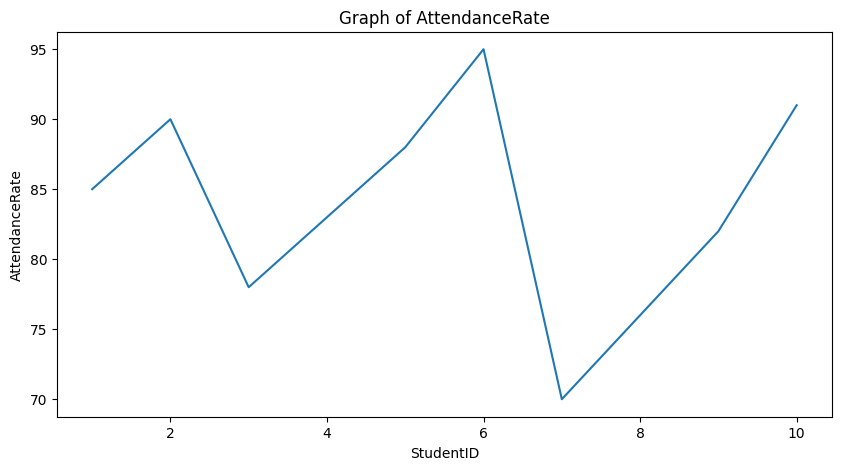

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['StudentID'], df['AttendanceRate']);
plt.title('Graph of AttendanceRate')
plt.xlabel('StudentID');
plt.ylabel('AttendanceRate');
plt.show()

# Show values of previous and final grade in the same coordinate system.

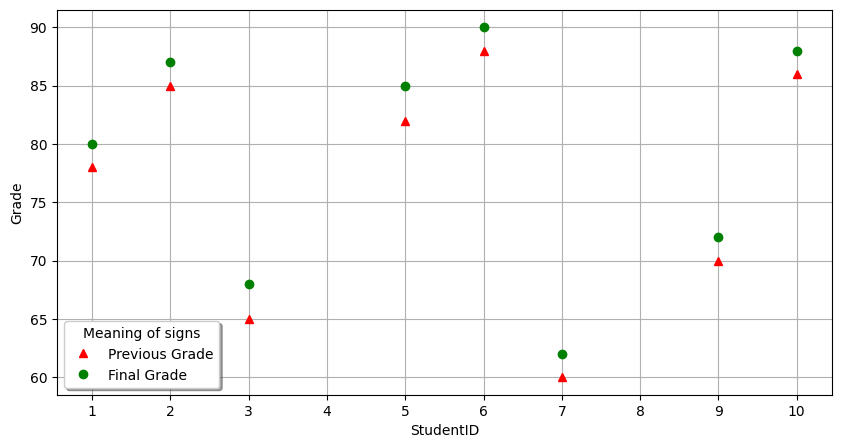

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(df['StudentID'], df['PreviousGrade'], "r^", label='Previous Grade')
plt.plot(df['StudentID'], df['FinalGrade'], "go", label='Final Grade')
plt.xlabel('StudentID');
plt.ylabel('Grade');
plt.legend(title="Meaning of signs", shadow=True)
plt.xticks(range(1, 11))
plt.show();

# Create bar graph for visualization the study hours per week for each student

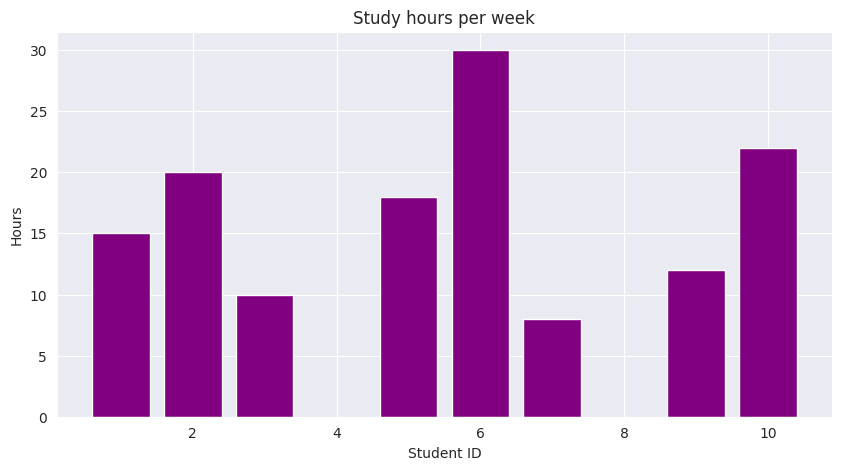

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
plt.bar(df['StudentID'], df['StudyHoursPerWeek'], color='purple')
plt.title('Study hours per week')
plt.ylabel('Hours')
plt.xlabel('Student ID')
plt.show()

# Make two alongside graph to see differences between extracurricular activities and study hours per week

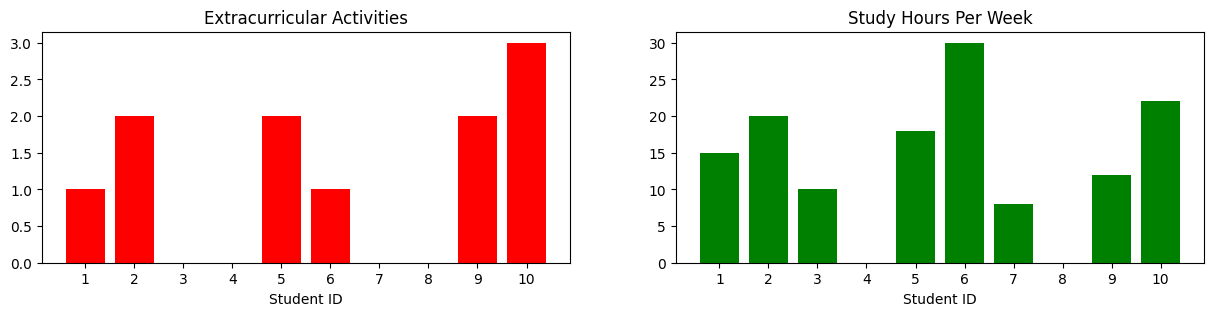

In [ ]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1);
plt.bar(df['StudentID'], df['ExtracurricularActivities'], color='red')
plt.title('Extracurricular Activities');
plt.xticks(range(1, 11));
plt.xlabel('Student ID')

plt.subplot(1, 2, 2)
plt.bar(df['StudentID'], df['StudyHoursPerWeek'], color='g')
plt.title('Study Hours Per Week')
plt.xticks(range(1, 11));
plt.xlabel('Student ID')

plt.show()

# Show percentage of each gender in the dataset

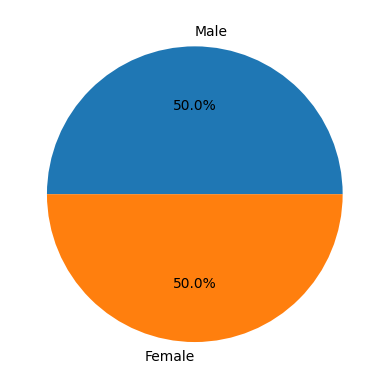

In [ ]:
# Count occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create pie chart with correct labels
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.show()

# Demonstrate final grade graph using seaborn library

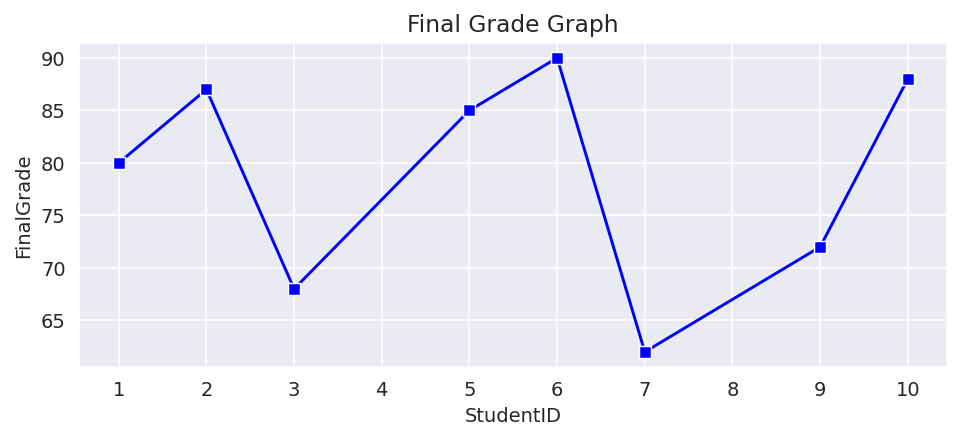

In [ ]:
plt.figure(figsize=(8, 3), dpi=140)
sns.set_style('darkgrid')
sns.lineplot(data=df, x='StudentID', y='FinalGrade', marker='s', color='blue')
plt.title('Final Grade Graph')
plt.xticks(range(1, 11));

# Analyze parental support using histogram for this purpose

Text(0.5, 1.0, 'Parental Support')

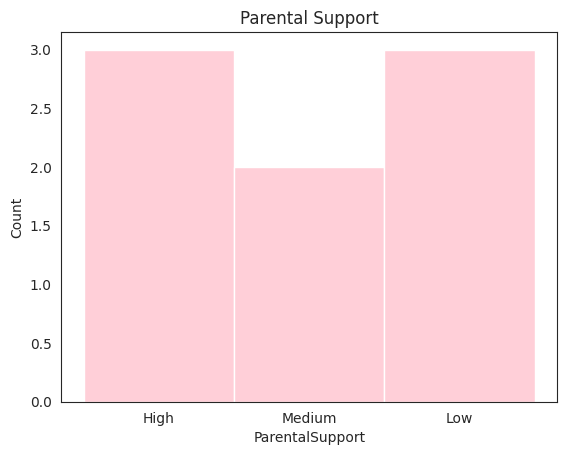

In [ ]:
sns.set_style('white')
sns.histplot(df['ParentalSupport'], binwidth=0.05, color='pink')
plt.title('Parental Support')

# Create heatmap to detect how final grade depends on attendance rate and study hours per week

<Axes: xlabel='None-StudyHoursPerWeek', ylabel='AttendanceRate'>

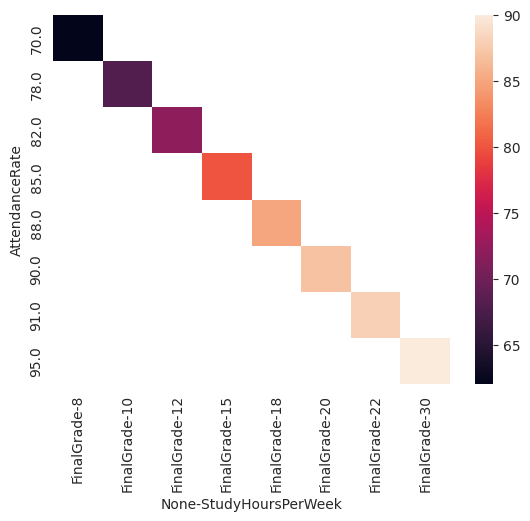

In [ ]:
pivot = df.pivot_table(
    index=['AttendanceRate'],
    columns=['StudyHoursPerWeek'],
    values=['FinalGrade'],
    aggfunc=np.average
);
sns.heatmap(pivot)